In [80]:
from WindPy import w
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calendar
import seaborn as sns
%matplotlib inline

In [81]:
DATA_DIR = u'D:/Data/derivatives/options'

In [82]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [83]:
def wind2df(raw_data):
    dic = {}
    for data, field in zip(raw_data.Data, raw_data.Fields):
        dic[field.lower()] = data
    if len(raw_data.Times) == len(raw_data.Data[0]):
        return pd.DataFrame(dic, index=raw_data.Times)
    else:
        return pd.DataFrame(dic)

# 获取所有期权合约列表

In [84]:
# raw_data = w.wset("optioncontractbasicinfo","exchange=sse;windcode=510050.SH;status=all")

In [85]:
# df = wind2df(raw_data)

In [86]:
# df = df.set_index('wind_code')

In [87]:
# df.to_excel(u'D:/Data/list/期权列表.xlsx')

# 获取50ETF价格序列

In [88]:
start_date = '2015-02-09'
end_date = '2017-10-20'

In [89]:
raw_data = w.wsd("510050.SH", "close", start_date, end_date)

In [90]:
df = wind2df(raw_data)

In [91]:
df.columns = ['510050.SH']

# 查找某个交易日的次月到期的ATM看跌期权价格

In [92]:
date = df.index[-1]

In [93]:
date

datetime.date(2017, 10, 20)

In [94]:
opt_df = pd.read_excel(u'D:/Data/list/期权列表.xlsx', index_col=0)

In [95]:
opt_df = opt_df[opt_df['call_or_put'] == u'认沽']

In [96]:
opt_df.head()

,call_or_put,contract_state,contract_unit,exercise_date,exercise_mode,exercise_price,expire_date,limit_month,listed_date,option_mark_code,option_type,reference_price,sec_name,settle_mode,settlement_date,trade_code
wind_code,,,,,,,,,,,,,,,,
10000006,认沽,退市,10000,2015-03-25,欧式,2.20,2015-03-25,2015-03,2015-02-09,510050.SH,ETF期权,0.0788,50ETF沽2015年3月2.20,实物资产,2015-03-26,510050P1503M02200
10000007,认沽,退市,10000,2015-03-25,欧式,2.25,2015-03-25,2015-03,2015-02-09,510050.SH,ETF期权,0.1001,50ETF沽2015年3月2.25,实物资产,2015-03-26,510050P1503M02250
10000008,认沽,退市,10000,2015-03-25,欧式,2.30,2015-03-25,2015-03,2015-02-09,510050.SH,ETF期权,0.1246,50ETF沽2015年3月2.30,实物资产,2015-03-26,510050P1503M02300
10000009,认沽,退市,10000,2015-03-25,欧式,2.35,2015-03-25,2015-03,2015-02-09,510050.SH,ETF期权,0.1522,50ETF沽2015年3月2.35,实物资产,2015-03-26,510050P1503M02350
10000010,认沽,退市,10000,2015-03-25,欧式,2.40,2015-03-25,2015-03,2015-02-09,510050.SH,ETF期权,0.1828,50ETF沽2015年3月2.40,实物资产,2015-03-26,510050P1503M02400


In [97]:
last_day = calendar.monthrange(year=date.year, month=date.month)[1]
expire_month = datetime.date(date.year, date.month, last_day) + datetime.timedelta(1)

In [98]:
expire_month.strftime('%Y-%m')

'2017-11'

In [99]:
opt_df = opt_df[opt_df['limit_month'] == expire_month.strftime('%Y-%m')]

In [100]:
price = df.loc[date, '510050.SH']

In [101]:
price

2.79

In [102]:
opt_df.loc[:, 'dif'] = (opt_df.loc[:, 'exercise_price'] - price).abs()

In [103]:
target_opt = opt_df.sort_values('dif').index[0]

In [104]:
target_opt

10001020

# 获取期权代码时间序列

In [107]:
opt_df = pd.read_excel(u'D:/Data/list/期权列表.xlsx', index_col=0)
opt_df = opt_df[opt_df['call_or_put'] == u'认沽']

In [108]:
opt_df.head()

,call_or_put,contract_state,contract_unit,exercise_date,exercise_mode,exercise_price,expire_date,limit_month,listed_date,option_mark_code,option_type,reference_price,sec_name,settle_mode,settlement_date,trade_code
wind_code,,,,,,,,,,,,,,,,
10000006,认沽,退市,10000,2015-03-25,欧式,2.20,2015-03-25,2015-03,2015-02-09,510050.SH,ETF期权,0.0788,50ETF沽2015年3月2.20,实物资产,2015-03-26,510050P1503M02200
10000007,认沽,退市,10000,2015-03-25,欧式,2.25,2015-03-25,2015-03,2015-02-09,510050.SH,ETF期权,0.1001,50ETF沽2015年3月2.25,实物资产,2015-03-26,510050P1503M02250
10000008,认沽,退市,10000,2015-03-25,欧式,2.30,2015-03-25,2015-03,2015-02-09,510050.SH,ETF期权,0.1246,50ETF沽2015年3月2.30,实物资产,2015-03-26,510050P1503M02300
10000009,认沽,退市,10000,2015-03-25,欧式,2.35,2015-03-25,2015-03,2015-02-09,510050.SH,ETF期权,0.1522,50ETF沽2015年3月2.35,实物资产,2015-03-26,510050P1503M02350
10000010,认沽,退市,10000,2015-03-25,欧式,2.40,2015-03-25,2015-03,2015-02-09,510050.SH,ETF期权,0.1828,50ETF沽2015年3月2.40,实物资产,2015-03-26,510050P1503M02400


In [109]:
for date in df.index:
    last_day = calendar.monthrange(year=date.year, month=date.month)[1]
    expire_month = datetime.date(date.year, date.month, last_day) + datetime.timedelta(1)
    temp_df = opt_df[(opt_df['limit_month'] == expire_month.strftime('%Y-%m')) & (opt_df['listed_date'] <= date)]
    price = df.loc[date, '510050.SH']
    temp_df.loc[:, 'dif'] = (temp_df.loc[:, 'exercise_price'] - price).abs()
    target_opt = temp_df.sort_values('dif').index[0]
    df.loc[date, 'wind_code'] = str(target_opt)
    df.loc[date, 'strike'] = opt_df.loc[target_opt, 'exercise_price']
    df.loc[date, 'expire_date'] = opt_df.loc[target_opt, 'expire_date']

In [110]:
df.head()

,510050.SH,wind_code,strike,expire_date
2015-02-09,2.331,10000009,2.35,2015-03-25
2015-02-10,2.369,10000009,2.35,2015-03-25
2015-02-11,2.380,10000010,2.40,2015-03-25
2015-02-12,2.384,10000010,2.40,2015-03-25
2015-02-13,2.390,10000010,2.40,2015-03-25


# 获取期权价格时间序列

In [111]:
df['option'] = 0.0
df.index = pd.to_datetime(df.index)

In [112]:
for index in df['wind_code'].unique():
    wind_code = '%s.SH'%(index)
#     print index
    fname = u'%s/%s.xlsx'%(DATA_DIR, wind_code)
    odf = pd.read_excel(fname, index_col=0)
    temp_df = df[df['wind_code'] == index]
    select_index = df[df['wind_code'] == index].index
#     print select_index
    df.loc[select_index, 'option'] = odf.loc[temp_df.index]['close']
    df.loc[select_index, 'im_vol'] = odf.loc[temp_df.index]['us_impliedvol']
#     print df.loc[select_index, 'option']
#     print odf.loc[temp_df.index]['close']
#     break

In [113]:
df.head()

,510050.SH,wind_code,strike,expire_date,option,im_vol
2015-02-09,2.331,10000009,2.35,2015-03-25,0.1268,0.376063
2015-02-10,2.369,10000009,2.35,2015-03-25,0.0975,0.343549
2015-02-11,2.380,10000010,2.40,2015-03-25,0.0992,0.289285
2015-02-12,2.384,10000010,2.40,2015-03-25,0.0888,0.265998
2015-02-13,2.390,10000010,2.40,2015-03-25,0.0730,0.228211


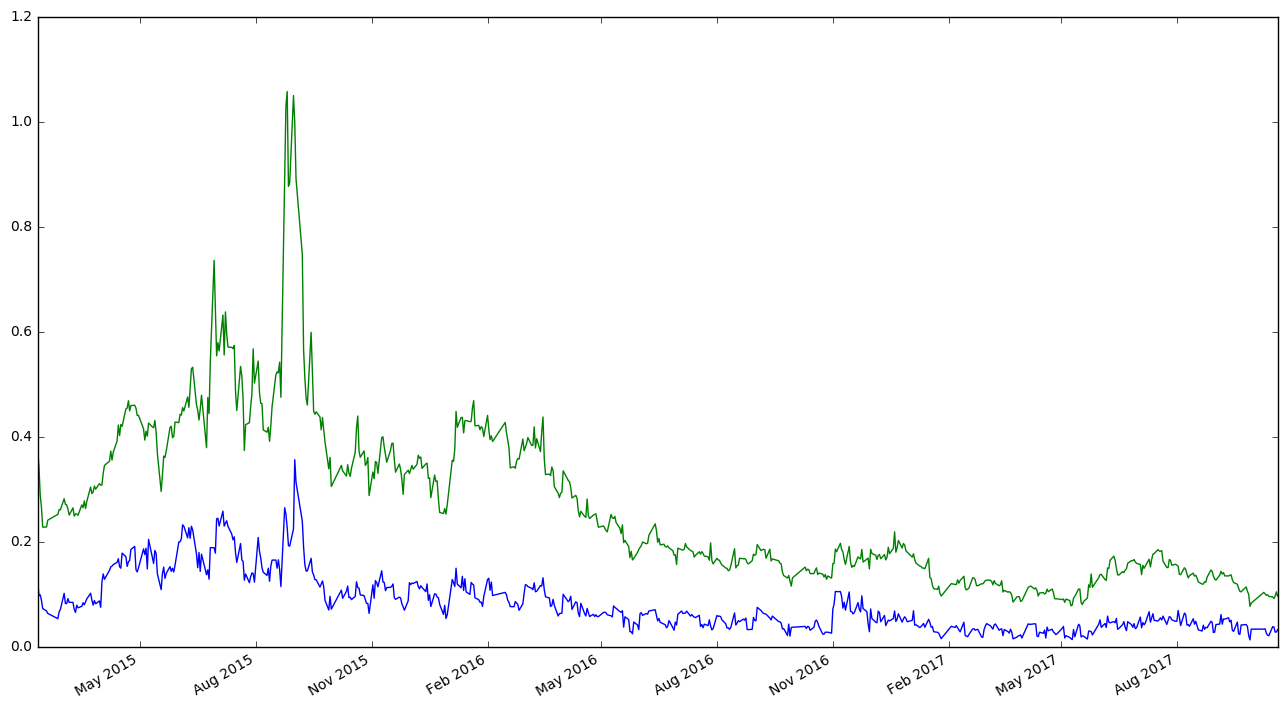

In [114]:
plt.figure(figsize=(16, 9))
df['option'].plot()
df['im_vol'].plot()

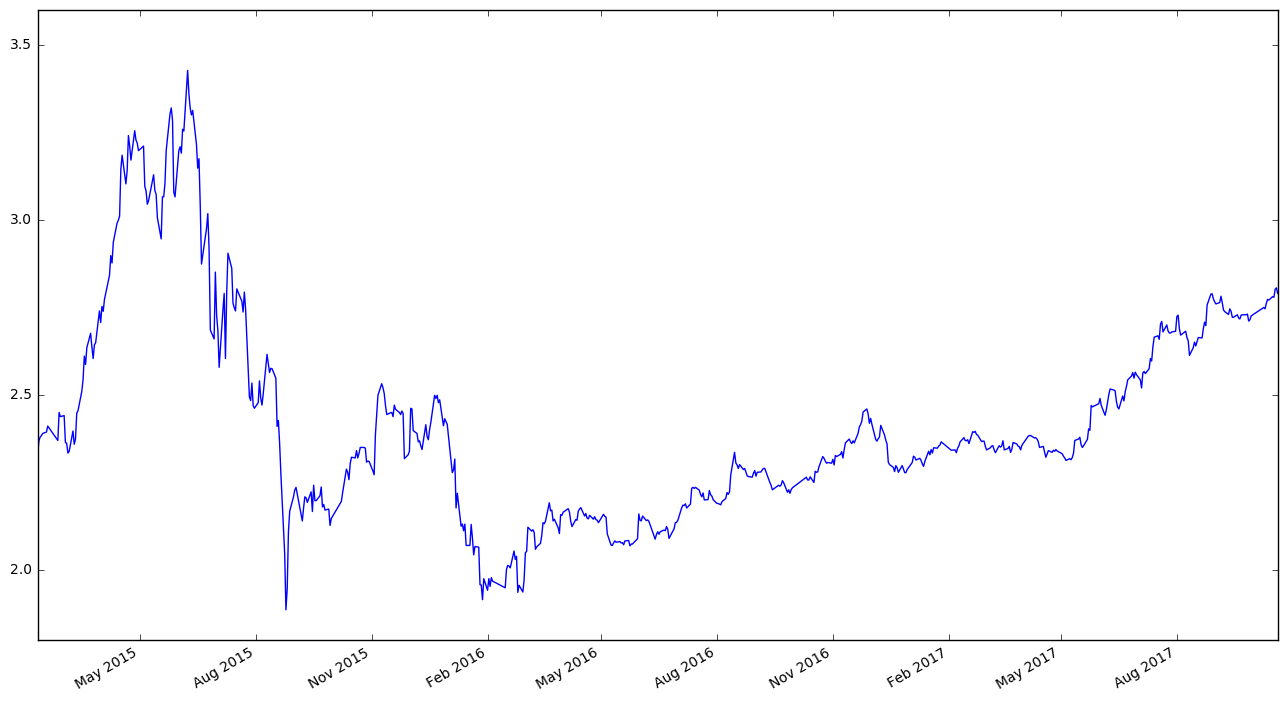

In [115]:
plt.figure(figsize=(16, 9))
df['510050.SH'].plot()

In [116]:
df.to_excel('./putwrite.xlsx')